source: http://www.lithoguru.com/scientist/statistics/Weighted%20regression%20demo.R

In [1]:
#----------------------------------------#
#--- Weighted Regression Results in R ---#
#----------------------------------------#

# Let's make up some data and weights
x = 1:5
y = c(1.1,2.5,3.4,3.8,7)

sd = c(0.3, 0.2, 0.2, 0.1, 0.5)
w = 1/sd^2

# perform the linear regression
model0 = lm(y ~ x)
summary(model0)


Call:
lm(formula = y ~ x)

Residuals:
    1     2     3     4     5 
 0.16  0.25 -0.16 -1.07  0.82 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.3700     0.8414  -0.440   0.6899  
x             1.3100     0.2537   5.163   0.0141 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8023 on 3 degrees of freedom
Multiple R-squared:  0.8989,	Adjusted R-squared:  0.8651 
F-statistic: 26.66 on 1 and 3 DF,  p-value: 0.01409


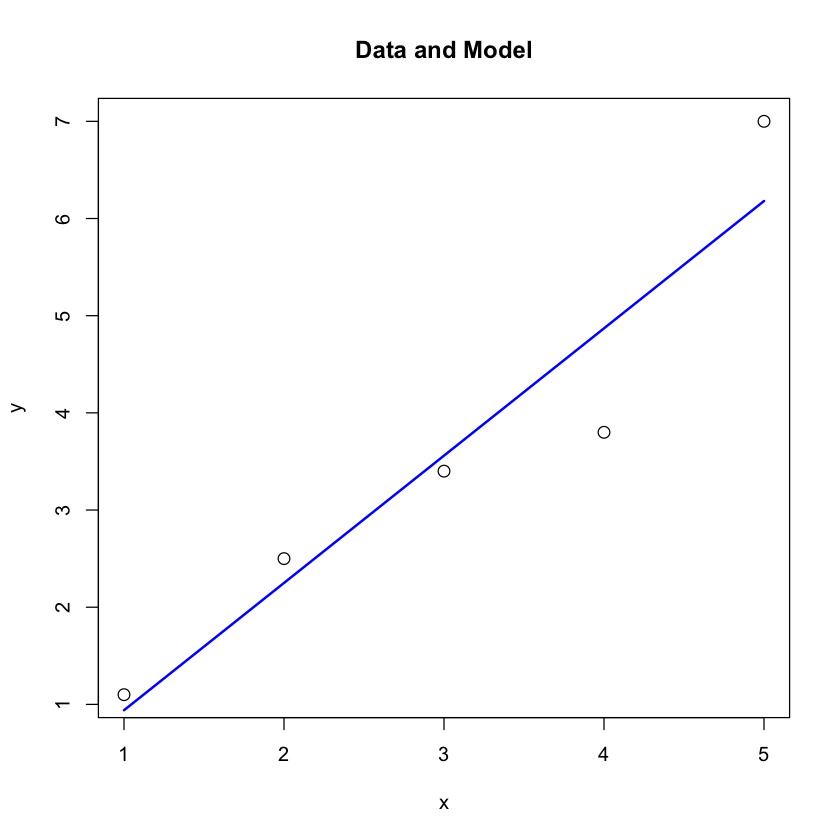

In [10]:
# plot the data and the best fit models
plot(y ~ x, cex = 1.3, main = "Data and Model")  
#now add the model line to the plot
lines(x, predict(model0), col = "blue", lwd=2)

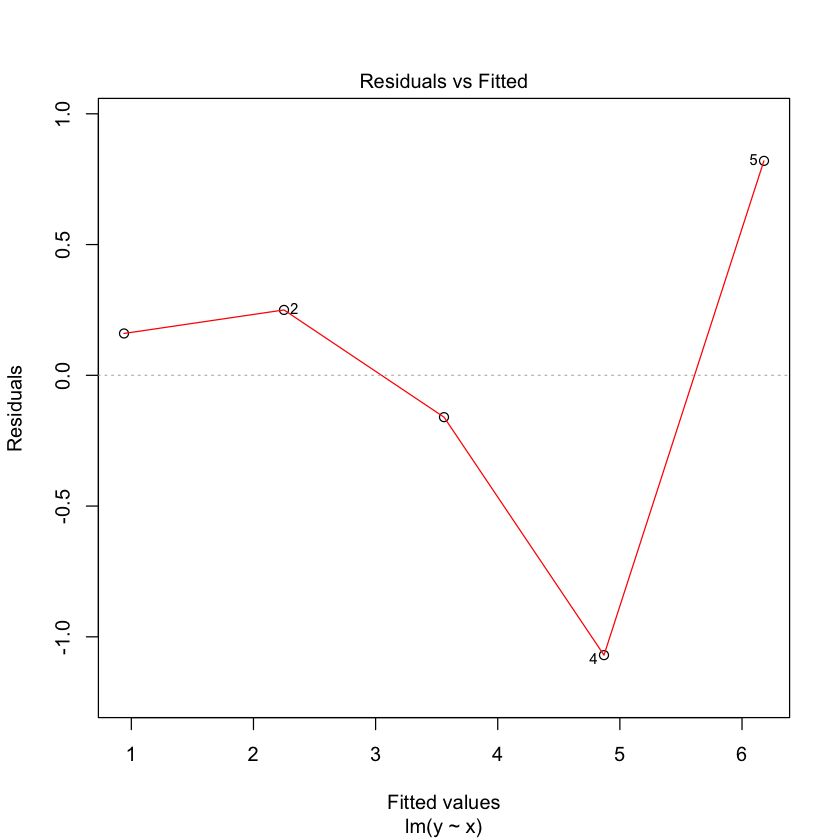

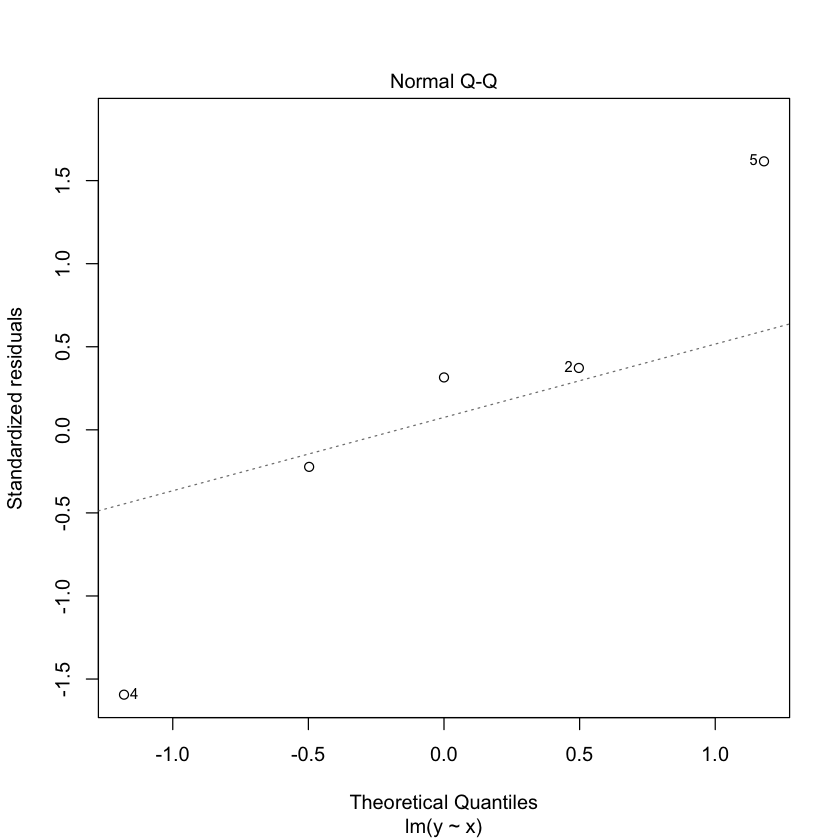

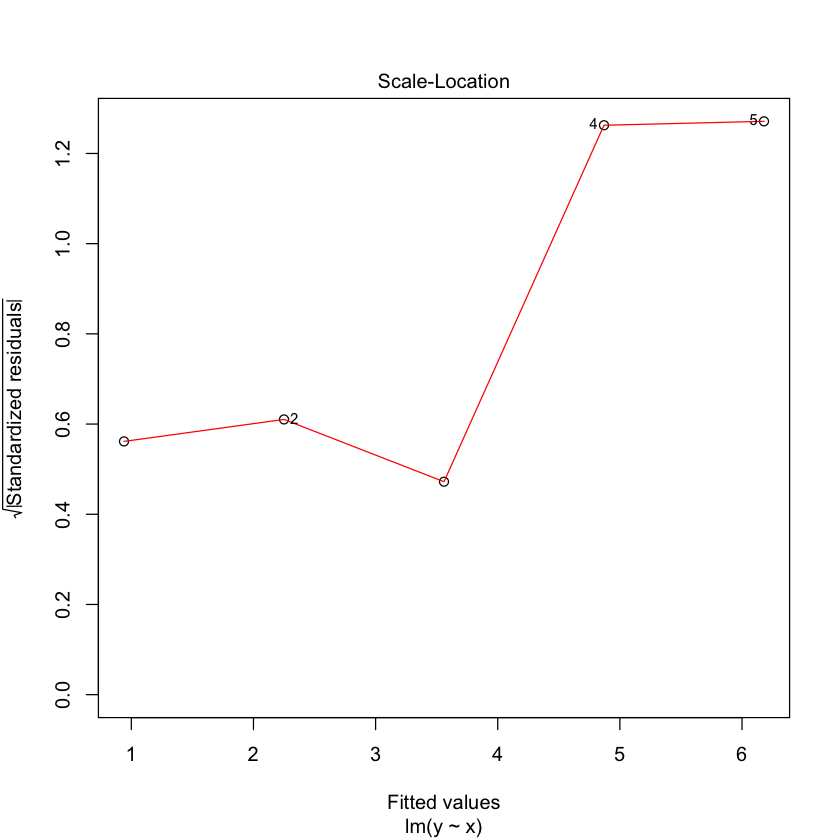

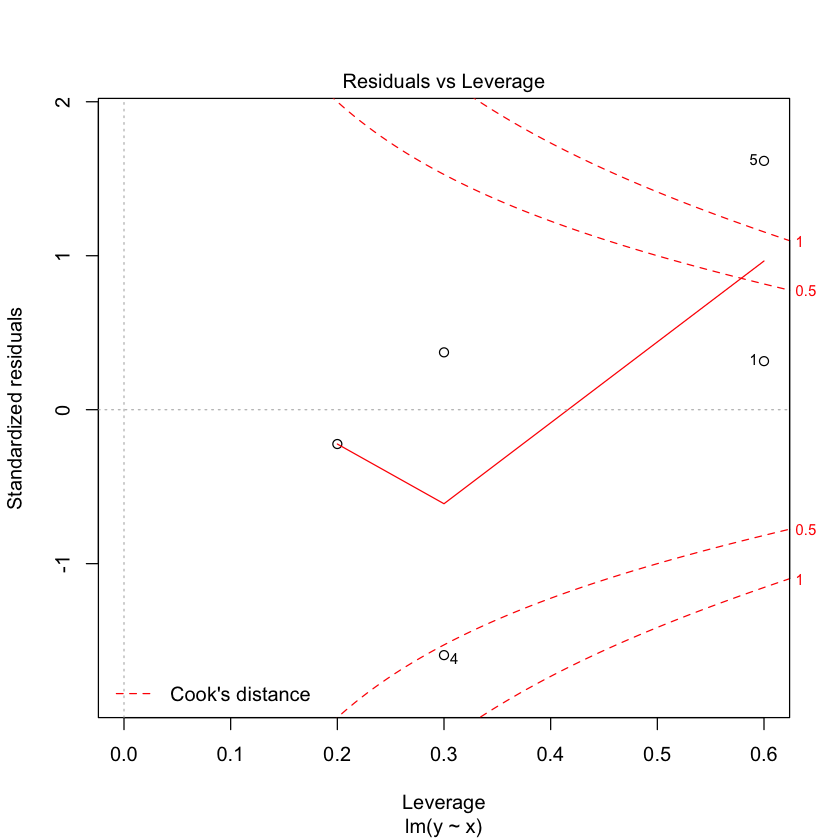

In [11]:
# check diagnostics for residuals
plot(model0)

In [2]:
#now perform the weighted regression using the weights above
model = lm(y ~ x, weights = w)
summary(model)


Call:
lm(formula = y ~ x, weights = w)

Weighted Residuals:
     1      2      3      4      5 
-1.014  1.184  1.389 -1.812  4.320 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.5453     0.8142   0.670   0.5510  
x             0.8590     0.2319   3.705   0.0342 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.961 on 3 degrees of freedom
Multiple R-squared:  0.8206,	Adjusted R-squared:  0.7608 
F-statistic: 13.72 on 1 and 3 DF,  p-value: 0.03417


In [6]:
# here are all the forms of residuals
install.packages('MASS')
library(MASS)
raw = resid(model)  # the raw residuals
isr = stdres(model)  # internally studentized residuals

# needed for the studres function
esr = studres(model)  # externally studentized residuals
wres = weighted.residuals(model)  # weighted raw residuals
# Note that isr and esr are calculated from the weighted residuals


The downloaded binary packages are in
	/var/folders/tw/j1fhz1vs0hvbqkyjb47bdgc80000gn/T//RtmpkBcwU6/downloaded_packages


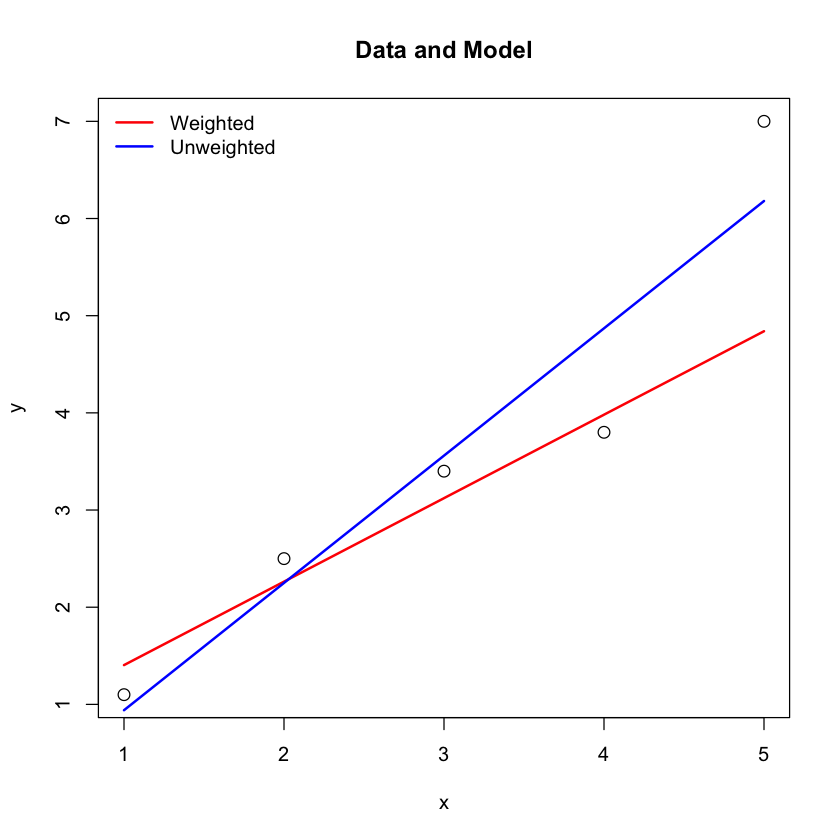

In [7]:
# plot the data and the best fit models
plot(y ~ x, cex = 1.3, main = "Data and Model")  
#now add the model line to the plot
lines(x, predict(model), col = "red", lwd=2)
lines(x, predict(model0), col = "blue", lwd=2)

legend("topleft", c("Weighted","Unweighted"), lty=c(1,1), lwd=c(2,2), col=c("red","blue"), bty="n") 

In [8]:
#manual calculation of the internally studentized residuals
res_SE = summary(model)$sigma
h = hatvalues(model)
isr_manual = wres/res_SE/sqrt(1-h)  # isr uses the weighted residuals
isr = stdres(model)  # This should give the exact same results


In [9]:
isr

1          2          3          4          5 
-0.4616247  0.5334525  0.5155301 -1.5829015  1.5289227